In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split

# load and review data

In [2]:
df= pd.read_csv('E:/Python Projects/shohreh/Shohreh_GitHub_Repository/Data-Analysis-And-Machine-Learning-Projects/5. SkLearn Datasets/Sklearn_CaliforniaHousingDataset/housing.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


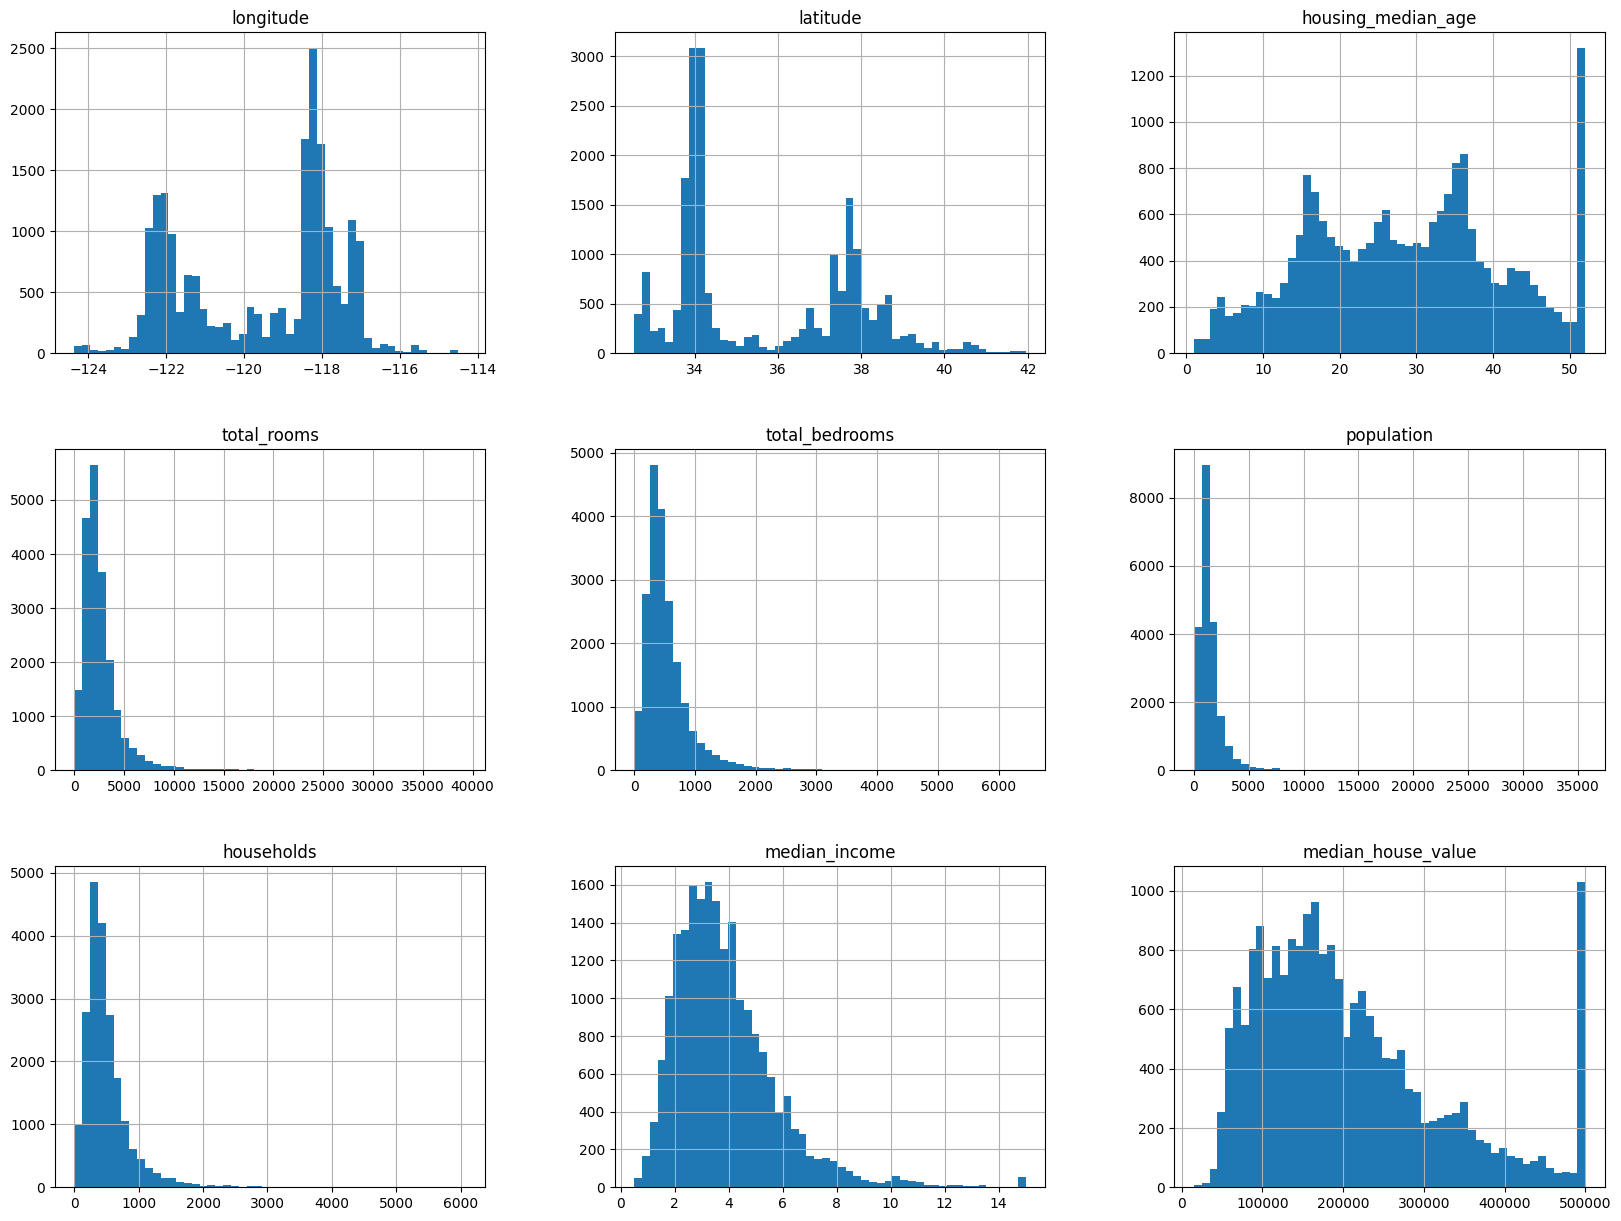

In [37]:
df.hist(bins=50, figsize= (20,15))
plt.show()

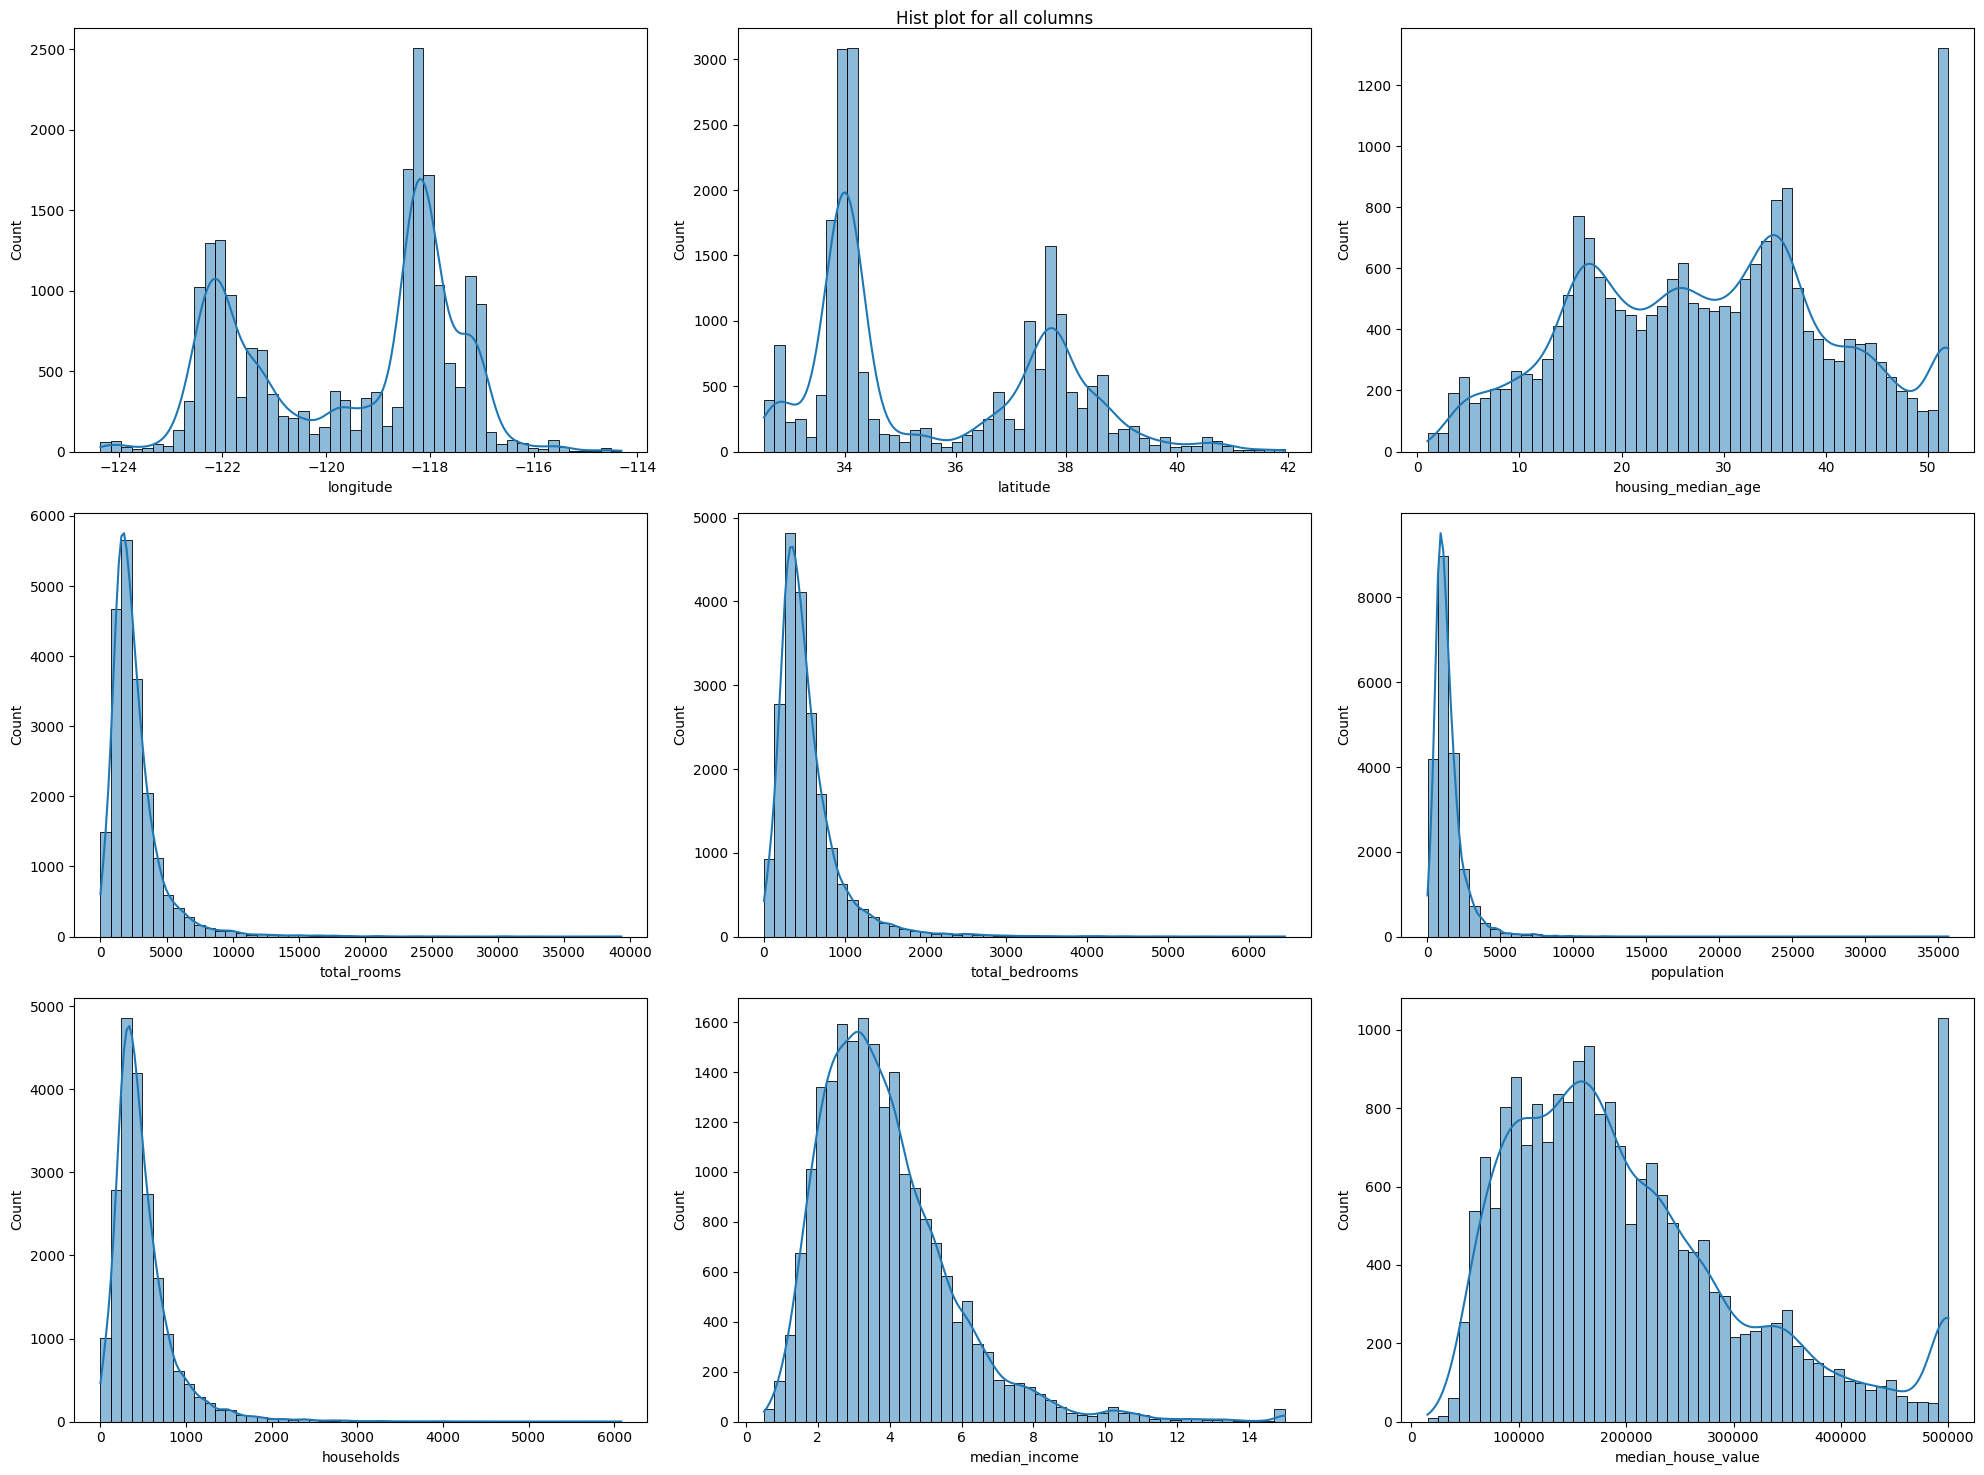

In [35]:
numeric_columns= df.select_dtypes(include=['number']).columns
numeric_columns
ncols=3
nrows= round(len(numeric_columns) / ncols)
fig, axes=plt.subplots(nrows=nrows, ncols=ncols,figsize=(20,15))
fig.suptitle('Hist plot for all columns')
axes= axes.flatten()
for i , col in enumerate(numeric_columns):
    sns.histplot(df[col], bins=50, edgecolor='black', kde= True, ax= axes[i])

plt.tight_layout()
plt.show()

# split data

In [62]:
X= df.drop(columns=['median_house_value'], axis=1)
y= df['median_house_value']

In [49]:
X_train, X_test, y_train, y_test= train_test_split(X, y, train_size=.8, random_state=42)

In [50]:
X_train.shape

(16512, 9)

In [63]:
from sklearn.model_selection import StratifiedShuffleSplit as sss
split= sss(n_splits= 1, train_size= .8, random_state= 42)
data=split.split(df,df['ocean_proximity'])

In [64]:
for i in data:
    print(i)

(array([ 2271,  5039, 10341, ...,  4534,  4665, 19307], dtype=int64), array([ 6683, 19038, 19687, ..., 15963, 14661, 18082], dtype=int64))
